# Podstawy Sztucznej Inteligencji 2018/2019



Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

## Klasyfikator minimalno-odległościowy jako klasyfikator liniowy



In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import make_blobs

blobs_data = None
blobs_target = None

train, train_labels = make_blobs(n_samples = 500, n_features=2, centers=2, random_state=1234)

a = 10
xx, yy = np.meshgrid(np.linspace(-a,a,60), np.linspace(-a,a,60))

In [28]:
class_means = np.array([np.mean(train[train_labels == i], axis = 0) for i in np.unique(train_labels)])
print(class_means)

[[-6.11472428  2.40975303]
 [-1.18984097  5.67112071]]


### Zadanie 1.

Oblicz środki klas.

In [29]:
# class_means = np.array([[-3,  2],[-.19,  3]])

In [30]:
np.testing.assert_allclose(class_means,[[-6.11,  2.40],[-1.19,  5.67]],rtol=1e-2)
assert class_means.shape == (2, 2)

Zweryfikujmy wizualnie wynik:

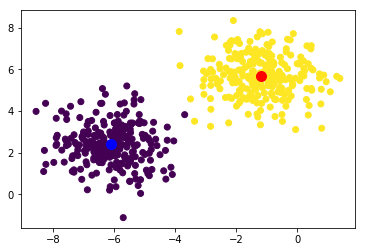

In [31]:
plt.scatter(train[:,0], train[:,1],c= np.ravel(train_labels))
plt.plot(class_means[0,0], class_means[0,1], 'bo',markersize=10)
plt.plot(class_means[1,0], class_means[1,1], 'ro',markersize=10)


Obszary decyzyjne dla klasyfikatora minimalno odległościowego, zaimplementowane z definicji:

In [32]:
xm,ym = class_means[:,0],  class_means[:,1]
d = np.argmin((xx[...,np.newaxis]-xm[np.newaxis,np.newaxis,:])**2+\
          (yy[...,np.newaxis]-ym[np.newaxis,np.newaxis,:])**2,axis=-1)

Wykres tych obszarów:

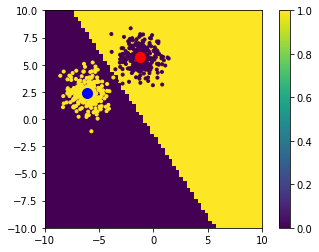

In [33]:
plt.imshow(d,origin='lower',extent=[-a,a,-a,a])
plt.colorbar()
plt.scatter(train[:,0], train[:,1],marker='.',c= -np.ravel(train_labels))
plt.plot(class_means[0,0], class_means[0,1], 'bo',markersize=10)
plt.plot(class_means[1,0], class_means[1,1], 'ro',markersize=10)



### Klasyfikator minimalno odległościowy jako klasyfikator liniowy

$$ \mathbf{w}\cdot\mathbf{x} = t$$

Wektor $\mathbf{w}$ jest równoległy do wektora $\mathbf{cm_1} - \mathbf{cm_0}$, gdzie $\mathbf{cm_1}$ i $\mathbf{cm_0}$ to środki geometryczne poszczególnych klas. 

Możemy przyjąć $\mathbf{w}=\mathbf{cm_1} - \mathbf{cm_0}$. Pozostaje ustalić wartość stałej $t$ (bias). Jendym z wyborów będzie takie $t$ by funkcja dyscryminacyjna znikała na środku odcinka  $(\mathbf{cm_0}, \mathbf{cm_1})$.
Warunek ten przyjmuje taką postać:

$$ \mathbf{w}\cdot\mathbf{x_{m}} - t = 0,$$

gdzie $\mathbf{x_{m}}$ to środek odcinka $(\mathbf{cm_0}, \mathbf{cm_1})$. 








### Zadanie 2

Oblicz wagi $\mathbf{w}$ i bias $t$ dla przykładowych danych i zweryfikuj wizualnie obszary decyzyjne

Obszary te  dane są wzorem:

$$ \mathbf{w}\cdot\mathbf{x} - t > 0$$ 

( `True` to klasa 1 a `False` to klasa 0 )


In [66]:
w = class_means[1]-class_means[0]
t = w.dot(0.5*(class_means[0]+class_means[1]))
d_lin = (np.tensordot(w,np.stack([xx,yy]),axes=[0,0])-t)>0

[]

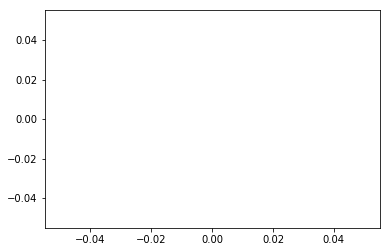

In [67]:
plt.plot()

In [68]:
np.testing.assert_allclose(w,[4.92, 3.261],rtol=1e-2)


In [69]:
np.testing.assert_allclose(t,-4.80,rtol=1e-2)


In [70]:
assert d_lin[2,3] ==  False
assert d_lin[44,43] ==  True

Wykonaj wykres obszarów decyzyjnych:

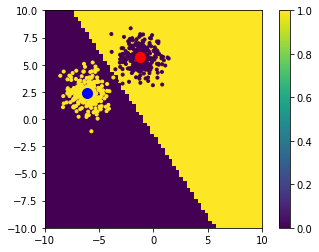

In [71]:
plt.imshow(d_lin.astype(np.float), origin='lower',extent=[-a,a,-a,a])
plt.colorbar()
plt.scatter(train[:,0], train[:,1],marker='.',c= -np.ravel(train_labels))
plt.plot(class_means[0,0], class_means[0,1], 'bo',markersize=10)
plt.plot(class_means[1,0], class_means[1,1], 'ro',markersize=10)
